In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/mushroom_training_results.csv')
df0

,Epoch,Predicted 0,Real 0
0,1,2.236060e-01,1
1,1,2.200170e-01,1
2,1,3.828070e-01,1
3,1,7.017410e-01,0
4,1,3.412090e-01,1
...,...,...,...
56865,10,9.951900e-01,1
56866,10,9.990160e-01,1
56867,10,5.406790e-07,0
56868,10,9.990070e-01,1


Установим порог p = 0.5

In [3]:
p = 0.5
df = df0
df['Predicted 0'] = np.where(df0['Predicted 0'] < 0.5, 0, 1)
df

,Epoch,Predicted 0,Real 0
0,1,0,1
1,1,0,1
2,1,0,1
3,1,1,0
4,1,0,1
...,...,...,...
56865,10,1,1
56866,10,1,1
56867,10,0,0
56868,10,1,1


In [4]:
accuracy_dict = {}
accuracy_data = pd.DataFrame({'Epoch': [], 'Value': []})
# Iterate over each epoch
for epoch, group in df.groupby('Epoch'):
    # Get the predicted and real columns for the epoch
    predicted_cols = group.filter(regex='Predicted')
    real_cols = group.filter(regex='Real')

    # Calculate accuracy for each pair of predicted and real columns
    accuracies = []
    # for pred_col, real_col in zip(predicted_cols, real_cols):
    correct_predictions = len(group[group['Predicted 0'] == group['Real 0']])
    total_predictions = len(group)
    accuracy = correct_predictions / total_predictions
    accuracies.append(accuracy)

    # Store the accuracies for the epoch in the dictionary
    accuracy_dict[epoch] = accuracies
    new_row = {'Epoch': epoch, 'Value': accuracy}
    accuracy_data = pd.concat([accuracy_data, pd.DataFrame([new_row])], ignore_index=True)

for epoch, accuracies in accuracy_dict.items():
    print(f"Epoch {epoch}: {accuracies}")

Epoch 1: [0.9189379286091085]
Epoch 2: [0.9442588359416212]
Epoch 3: [0.9497098646034816]
Epoch 4: [0.9539300158255671]
Epoch 5: [0.9563917707051169]
Epoch 6: [0.9590293652189203]
Epoch 7: [0.9593810444874274]
Epoch 8: [0.960787761561456]
Epoch 9: [0.9620186390012309]
Epoch 10: [0.9630736768067523]


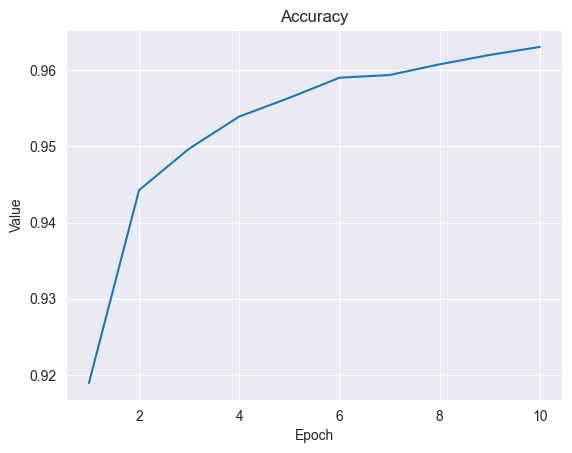

In [5]:
plt.plot(accuracy_data['Epoch'], accuracy_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Accuracy')
plt.show()

In [6]:
f_measure_dict = {}
f_measure_data = pd.DataFrame({'Epoch': [], 'Value': []})
# Iterate over each epoch
for epoch, group in df.groupby('Epoch'):
    # Get the predicted and real columns for the epoch
    predicted_cols = group['Predicted 0']
    real_cols = group['Real 0']

    # Calculate true positives, false positives, and false negatives for each pair of predicted and real columns
    tp = ((predicted_cols == 1) & (real_cols == 1)).sum(axis=0)
    fp = ((predicted_cols == 1) & (real_cols == 0)).sum(axis=0)
    fn = ((predicted_cols == 0) & (real_cols == 1)).sum(axis=0)

    # Calculate precision, recall, and F-measure for each pair of columns
    precisions = tp / (tp + fp)
    recalls = tp / (tp + fn)
    f_measures = 2 * (precisions * recalls) / (precisions + recalls)

    # Store the F-measures for the epoch in the dictionary
    f_measure_dict[epoch] = f_measures
    new_row = {'Epoch': epoch, 'Value': f_measures}
    f_measure_data = pd.concat([f_measure_data, pd.DataFrame([new_row])], ignore_index=True)

# Print the F-measure values for each epoch
for epoch, f_measures in f_measure_dict.items():
    print(f"Epoch {epoch}: {f_measures}")

Epoch 1: 0.9371163552039284
Epoch 2: 0.9564500618216787
Epoch 3: 0.9604972375690607
Epoch 4: 0.9637821398949405
Epoch 5: 0.9656889872717213
Epoch 6: 0.9677687093650574
Epoch 7: 0.968045372803984
Epoch 8: 0.9691434896914348
Epoch 9: 0.9701162147205313
Epoch 10: 0.9709302325581395


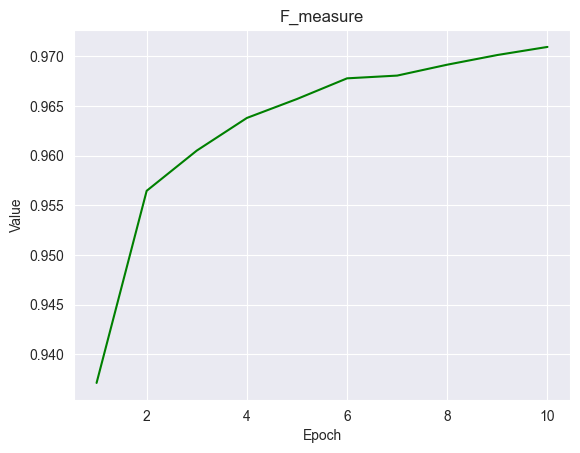

In [7]:
plt.plot(f_measure_data['Epoch'], f_measure_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('F_measure')
plt.show()

In [8]:
df2 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/mushroom_testing_results.csv')
display(df2)

,Number,Predicted 0,Real 0
0,0,8.979960e-01,1
1,1,5.192530e-03,0
2,2,1.442110e-04,0
3,3,8.041230e-07,0
4,4,9.200460e-01,1
...,...,...,...
2432,2432,9.847730e-01,1
2433,2433,9.289450e-01,1
2434,2434,9.977230e-01,1
2435,2435,5.508990e-04,0


In [30]:
# f_measure_dict = {}
# f_measure_data = pd.DataFrame({'Epoch': [], 'Value': []})
tpr_list = [0.0]
fpr_list = [0.0]
for p in np.arange(0, 1, 0.001):
    # Get the predicted and real columns for the epoch
    predicted_cols = df2['Predicted 0']
    real_cols = df2['Real 0']

    # Calculate true positives, false positives, and false negatives for each pair of predicted and real columns
    tp = ((predicted_cols >= p) & (real_cols == 1)).sum(axis=0)
    fp = ((predicted_cols >= p) & (real_cols == 0)).sum(axis=0)
    fn = ((predicted_cols < p) & (real_cols == 1)).sum(axis=0)
    tn = ((predicted_cols < p) & (real_cols == 0)).sum(axis=0)

    # Calculate precision, recall, and F-measure for each pair of columns
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)

    tpr_list.append(tpr)
    fpr_list.append(fpr)


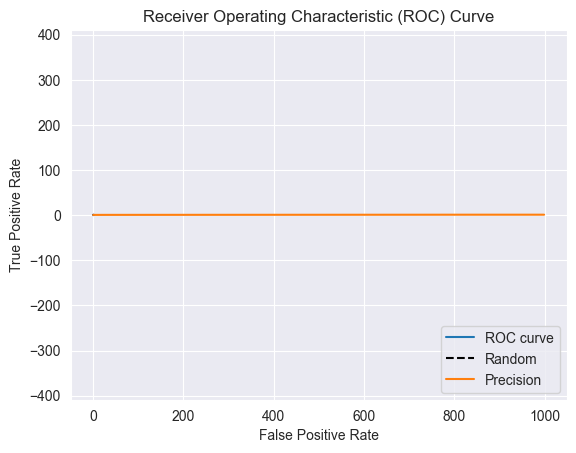

In [32]:
plt.plot(fpr_list, tpr_list, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()